# FRAUD CHECK DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report

In [2]:
data=pd.read_csv(r"C:\Users\Sujal Sahu\Downloads\Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [5]:
data.shape

(600, 6)

In [6]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
bins = [0,30000,np.inf]
names = ['Risk', 'Good']

In [8]:
data['Taxable.Income'] = pd.cut(data['Taxable.Income'], bins, labels=names)
data['Taxable.Income']

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risk' < 'Good']

In [9]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [10]:
categorical = [col for col in data.columns if data[col].dtype==object]

for col in categorical:
    temp = {}
    count = 0
    for val in data[col].values:
        try:
            temp[val]
        except:
            temp[val] = count
            count += 1
    data[col] = [temp[x] for x in data[col].values]
print(data[categorical])

     Undergrad  Marital.Status  Urban
0            0               0      0
1            1               1      0
2            0               2      0
3            1               0      0
4            0               2      1
..         ...             ...    ...
595          1               1      0
596          1               1      0
597          0               1      0
598          1               2      1
599          0               1      1

[600 rows x 3 columns]


In [11]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,Good,50047,10,0
1,1,1,Good,134075,18,0
2,0,2,Good,160205,30,0
3,1,0,Good,193264,15,0
4,0,2,Good,27533,28,1
...,...,...,...,...,...,...
595,1,1,Good,39492,7,0
596,1,1,Good,55369,2,0
597,0,1,Good,154058,0,0
598,1,2,Good,180083,17,1


In [12]:
y = data['Taxable.Income']
data.drop(['Taxable.Income'], axis=1, inplace=True)
X = data
del data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

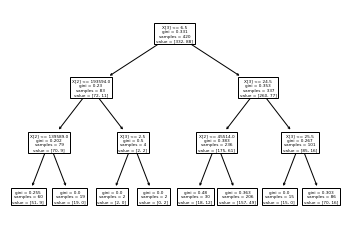

In [23]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(X_train, y_train)
tree.plot_tree(model);

In [14]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [15]:
print("Report : ",classification_report(y_test, y_pred) 
) 

Report :                precision    recall  f1-score   support

        Good       0.80      0.76      0.78       144
        Risk       0.20      0.25      0.23        36

    accuracy                           0.66       180
   macro avg       0.50      0.50      0.50       180
weighted avg       0.68      0.66      0.67       180



In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[109,  35],
       [ 27,   9]], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix ,ConfusionMatrixDisplay

accuracy_score(y_test,y_pred)*100

65.55555555555556

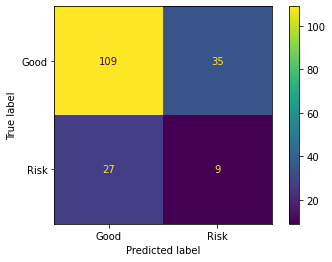

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)